In [1]:
%matplotlib notebook

In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Load Observed data
observed = pd.read_csv("skittles_load.csv")
observed.head(5)

,bag_number,purple,green,red,yellow,orange,total_perf,d_purple,d_green,d_red,d_yellow,d_orange,total_def,bag_total
0,1,3,25,6,14,6,54,0,0,2,1,1,4,58
1,2,12,11,10,14,9,56,0,1,2,1,4,8,64
2,3,8,13,6,17,10,54,0,5,0,1,1,7,61
3,4,13,9,12,9,10,53,1,0,2,1,1,5,58
4,5,13,7,8,13,11,52,0,0,1,1,3,5,57


In [4]:
# Observed data calculations
observed['perf'] = observed['purple'] + observed['green'] + observed['red'] + observed['yellow'] + observed['orange']
observed['def'] = observed['d_purple'] + observed['d_green'] + observed['d_red'] + observed['d_yellow'] + observed['d_orange']
observed['total'] = observed['perf'] + observed['def']
observed.head(5) 

,bag_number,purple,green,red,yellow,orange,total_perf,d_purple,d_green,d_red,d_yellow,d_orange,total_def,bag_total,perf,def,total
0,1,3,25,6,14,6,54,0,0,2,1,1,4,58,54,4,58
1,2,12,11,10,14,9,56,0,1,2,1,4,8,64,56,8,64
2,3,8,13,6,17,10,54,0,5,0,1,1,7,61,54,7,61
3,4,13,9,12,9,10,53,1,0,2,1,1,5,58,53,5,58
4,5,13,7,8,13,11,52,0,0,1,1,3,5,57,52,5,57


In [5]:
# Load Simulated data
simulated = pd.read_csv("skittles_fixed.csv")
simulated.head(5)

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange
0,1,3,25,6,14,6,0,0,2,1,1
1,2,12,11,10,14,9,0,1,2,1,4
2,3,8,13,6,17,10,0,5,0,1,1
3,4,13,9,12,9,10,1,0,2,1,1
4,5,13,7,8,13,11,0,0,1,1,3


In [6]:
# Simulated data calculations
simulated['perf'] = simulated['purple'] + simulated['green'] + simulated['red'] + simulated['yellow'] + simulated['orange']
simulated['def'] = simulated['d_purple'] + simulated['d_green'] + simulated['d_red'] + simulated['d_yellow'] + simulated['d_orange']
simulated['total'] = simulated['perf'] + simulated['def']
simulated.head(5) 

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange,perf,def,total
0,1,3,25,6,14,6,0,0,2,1,1,54,4,58
1,2,12,11,10,14,9,0,1,2,1,4,56,8,64
2,3,8,13,6,17,10,0,5,0,1,1,54,7,61
3,4,13,9,12,9,10,1,0,2,1,1,53,5,58
4,5,13,7,8,13,11,0,0,1,1,3,52,5,57


In [7]:
# Total Observed
total = observed['total']

In [8]:
# Total Simulated
stotal = simulated['total']

In [9]:
# Observed vs Simulated Descriptive Statistics
total_ds = pd.DataFrame({'observed': total, 'simulated': stotal})
total_ds.describe()

,observed,simulated
count,100.000000,100.000000
mean,61.460000,61.460000
std,3.591291,3.591291
min,52.000000,52.000000
25%,59.000000,59.000000
50%,61.000000,61.000000
75%,63.000000,63.000000
max,73.000000,73.000000


In [10]:
# Red Observed
red = observed['red'] + observed['d_red']
red_slope, red_int, red_r, red_p, red_std_err = stats.linregress(total, red)
red_fit = red_slope * total + red_int

In [11]:
# Red Simulated
sred = simulated['red'] + simulated['d_red']
sred_slope, sred_int, sred_r, sred_p, sred_std_err = stats.linregress(stotal, sred)
sred_fit = sred_slope * stotal + sred_int

In [12]:
# Red Observed vs Simulated descriptive statistics
red_ds = pd.DataFrame({'observed': red, 'simulated': sred})
red_ds.describe()

,observed,simulated
count,100.000000,100.000000
mean,11.860000,11.860000
std,3.259857,3.259857
min,5.000000,5.000000
25%,9.750000,9.750000
50%,12.000000,12.000000
75%,14.000000,14.000000
max,23.000000,23.000000


<IPython.core.display.Javascript object>


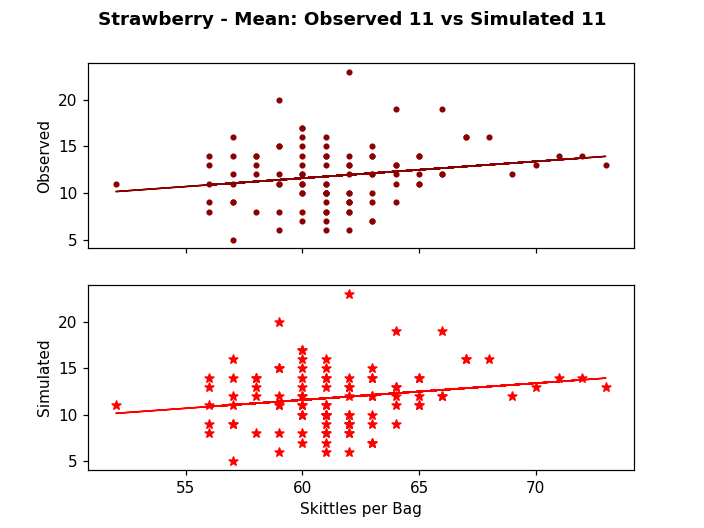

Text(0.5, 0, 'Skittles per Bag')

In [13]:
# Red Plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Strawberry - Mean: Observed " + str(int(np.mean(red))) + " vs Simulated " + str(int(np.mean(sred))), fontsize=12, fontweight="bold")

ax1.scatter(total, red, c="DarkRed", marker=".")
ax1.plot(total, red_fit, c="DarkRed", linewidth=1)
ax1.set_ylabel("Observed")

ax2.scatter(stotal, sred, c="Red", marker="*")
ax2.plot(stotal, sred_fit, c="Red", linewidth=1)
ax2.set_ylabel("Simulated")

ax2.set_xlabel("Skittles per Bag")


In [14]:
# Yellow Observed
yel = observed['yellow'] + observed['d_yellow']
yel_slope, yel_int, yel_r, yel_p, yel_std_err = stats.linregress(total, yel)
yel_fit = yel_slope * total + yel_int

In [15]:
# Yellow Simulated
syel = simulated['yellow'] + simulated['d_yellow']
syel_slope, syel_int, syel_r, syel_p, syel_std_err = stats.linregress(stotal, syel)
syel_fit = syel_slope * stotal + syel_int

In [16]:
# Yellow Observed vs Simulated descriptive statistics
yel_ds = pd.DataFrame({'observed': yel, 'simulated': syel})
yel_ds.describe()

,observed,simulated
count,100.00000,100.00000
mean,12.78000,12.78000
std,3.30772,3.30772
min,6.00000,6.00000
25%,10.00000,10.00000
50%,13.00000,13.00000
75%,15.00000,15.00000
max,21.00000,21.00000


<IPython.core.display.Javascript object>


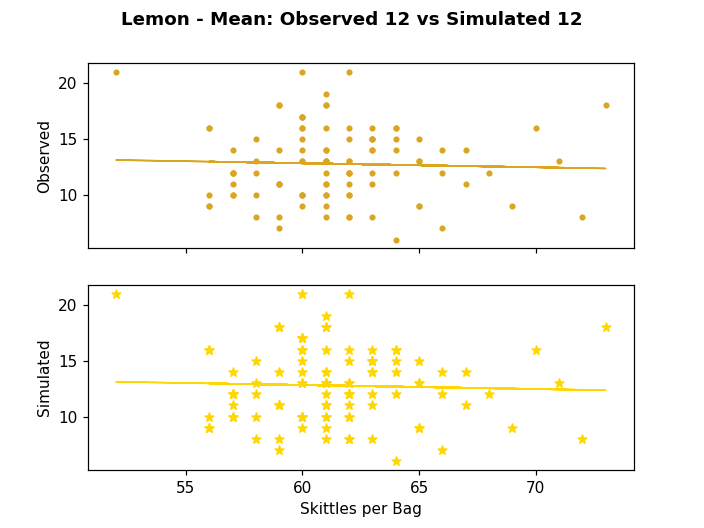

Text(0.5, 0, 'Skittles per Bag')

In [17]:
# Yellow Plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Lemon - Mean: Observed " + str(int(np.mean(yel))) + " vs Simulated " + str(int(np.mean(syel))), fontsize=12, fontweight="bold")

ax1.scatter(total, yel, c="Goldenrod", marker=".")
ax1.plot(total, yel_fit, c="Goldenrod", linewidth=1)
ax1.set_ylabel("Observed")

ax2.scatter(stotal, syel, c="Gold", marker="*")
ax2.plot(stotal, syel_fit, c="Gold", linewidth=1)
ax2.set_ylabel("Simulated")

ax2.set_xlabel("Skittles per Bag")


In [18]:
# Green Observed
gre = observed['green'] + observed['d_green']
gre_slope, gre_int, gre_r, gre_p, gre_std_err = stats.linregress(total, gre)
gre_fit = gre_slope * total + gre_int

In [19]:
# Green Simulated
sgre = simulated['green'] + simulated['d_green']
sgre_slope, sgre_int, sgre_r, sgre_p, sgre_std_err = stats.linregress(stotal, sgre)
sgre_fit = sgre_slope * stotal + sgre_int

In [20]:
# Green Observed vs Simulated Descriptive Statistics
gre_ds = pd.DataFrame({'observed': gre, 'simulated': sgre})
gre_ds.describe()

,observed,simulated
count,100.000000,100.000000
mean,13.020000,13.020000
std,3.595676,3.595676
min,4.000000,4.000000
25%,11.000000,11.000000
50%,13.000000,13.000000
75%,15.000000,15.000000
max,25.000000,25.000000


<IPython.core.display.Javascript object>


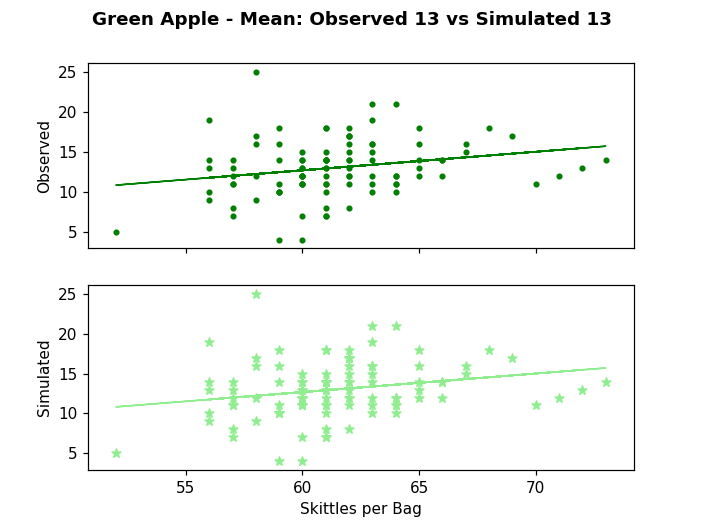

Text(0.5, 0, 'Skittles per Bag')

In [21]:
# Green Plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Green Apple - Mean: Observed " + str(int(np.mean(gre))) + " vs Simulated " + str(int(np.mean(sgre))), fontsize=12, fontweight="bold")

ax1.scatter(total, gre, c="Green", marker=".")
ax1.plot(total, gre_fit, c="Green", linewidth=1)
ax1.set_ylabel("Observed")

ax2.scatter(stotal, sgre, c="LightGreen", marker="*")
ax2.plot(stotal, sgre_fit, c="LightGreen", linewidth=1)
ax2.set_ylabel("Simulated")

ax2.set_xlabel("Skittles per Bag")


In [22]:
# Orange Observed
ora = observed['orange'] + observed['d_orange']
ora_slope, ora_int, ora_r, ora_p, ora_std_err = stats.linregress(total, ora)
ora_fit = ora_slope * total + ora_int

In [23]:
# Orange Simulated
sora = simulated['orange'] + simulated['d_orange']
sora_slope, sora_int, sora_r, sora_p, sora_std_err = stats.linregress(stotal, sora)
sora_fit = sora_slope * stotal + sora_int

In [24]:
# Orange Observed vs Simulated Descriptive Statistics
ora_ds = pd.DataFrame({'observed': ora, 'simulated': sora})
ora_ds.describe()

,observed,simulated
count,100.000000,100.000000
mean,13.090000,13.090000
std,3.853622,3.853622
min,5.000000,5.000000
25%,10.000000,10.000000
50%,13.000000,13.000000
75%,16.000000,16.000000
max,26.000000,26.000000


<IPython.core.display.Javascript object>


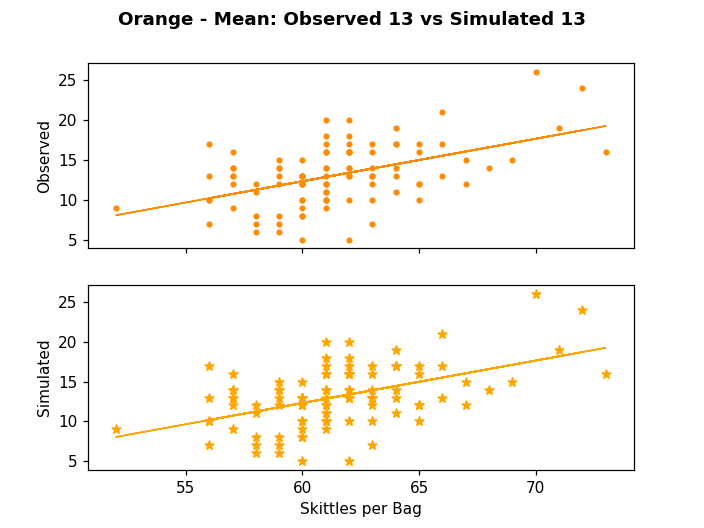

Text(0.5, 0, 'Skittles per Bag')

In [25]:
# Orange Plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Orange - Mean: Observed " + str(int(np.mean(ora))) + " vs Simulated " + str(int(np.mean(sora))), fontsize=12, fontweight="bold")

ax1.scatter(total, ora, c="DarkOrange", marker=".")
ax1.plot(total, ora_fit, c="DarkOrange", linewidth=1)
ax1.set_ylabel("Observed")

ax2.scatter(stotal, sora, c="Orange", marker="*")
ax2.plot(stotal, sora_fit, c="Orange", linewidth=1)
ax2.set_ylabel("Simulated")

ax2.set_xlabel("Skittles per Bag")


In [26]:
# Purple Observed
pur = observed['purple'] + observed['d_purple']
pur_slope, pur_int, pur_r, pur_p, pur_std_err = stats.linregress(total, pur)
pur_fit = pur_slope * total + pur_int

In [27]:
# Purple Simulated
spur = simulated['purple'] + simulated['d_purple']
spur_slope, spur_int, spur_r, spur_p, spur_std_err = stats.linregress(stotal, spur)
spur_fit = spur_slope * stotal + spur_int

In [28]:
# Purple Observed vs Simulated Descriptive Statistics
pur_ds = pd.DataFrame({'observed': pur, 'simulated': spur})
pur_ds.describe()

,observed,simulated
count,100.000000,100.000000
mean,10.710000,10.710000
std,3.056026,3.056026
min,3.000000,3.000000
25%,8.000000,8.000000
50%,11.000000,11.000000
75%,13.000000,13.000000
max,19.000000,19.000000


<IPython.core.display.Javascript object>


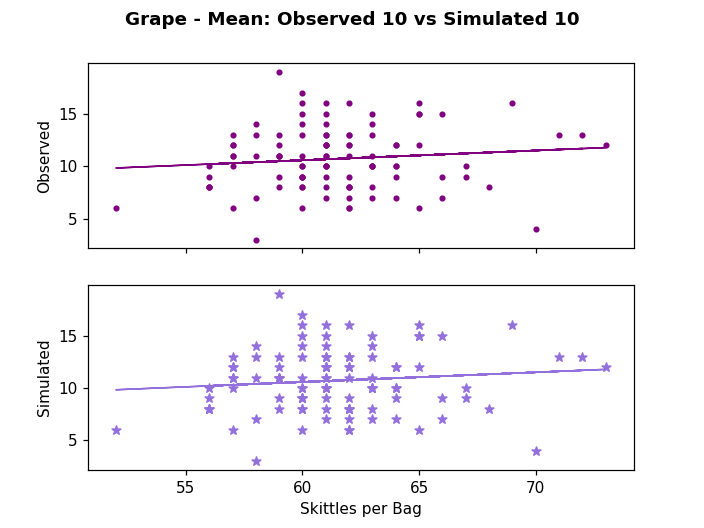

Text(0.5, 0, 'Skittles per Bag')

In [29]:
# Puple Plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Grape - Mean: Observed " + str(int(np.mean(pur)))  + " vs Simulated " + str(int(np.mean(spur))), fontsize=12, fontweight="bold")

ax1.scatter(total, pur, c="Purple", marker=".")
ax1.plot(total, pur_fit, c="Purple", linewidth=1)
ax1.set_ylabel("Observed")

ax2.scatter(stotal, spur, c="MediumPurple", marker="*")
ax2.plot(stotal, spur_fit, c="MediumPurple", linewidth=1)
ax2.set_ylabel("Simulated")

ax2.set_xlabel("Skittles per Bag")


In [30]:
# All Colors Observed Descriptive Statistics
observed_ds = pd.DataFrame({'observed': total, 'red': red, 'yellow': yel, 'green': gre, 'orange': ora, 'purple': pur})
observed_ds.describe()

,observed,red,yellow,green,orange,purple
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,61.460000,11.860000,12.78000,13.020000,13.090000,10.710000
std,3.591291,3.259857,3.30772,3.595676,3.853622,3.056026
min,52.000000,5.000000,6.00000,4.000000,5.000000,3.000000
25%,59.000000,9.750000,10.00000,11.000000,10.000000,8.000000
50%,61.000000,12.000000,13.00000,13.000000,13.000000,11.000000
75%,63.000000,14.000000,15.00000,15.000000,16.000000,13.000000
max,73.000000,23.000000,21.00000,25.000000,26.000000,19.000000


In [31]:
# All Colors Simulated Descriptive Statistics
simulated_ds = pd.DataFrame({'simulated': stotal, 'red': sred, 'yellow': syel, 'green': sgre, 'orange': sora, 'purple': spur})
simulated_ds.describe()

,simulated,red,yellow,green,orange,purple
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,61.460000,11.860000,12.78000,13.020000,13.090000,10.710000
std,3.591291,3.259857,3.30772,3.595676,3.853622,3.056026
min,52.000000,5.000000,6.00000,4.000000,5.000000,3.000000
25%,59.000000,9.750000,10.00000,11.000000,10.000000,8.000000
50%,61.000000,12.000000,13.00000,13.000000,13.000000,11.000000
75%,63.000000,14.000000,15.00000,15.000000,16.000000,13.000000
max,73.000000,23.000000,21.00000,25.000000,26.000000,19.000000
